In [35]:
# import the necessary libraries
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# loading the dataset into the appropriate variables
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [36]:
print('Size of the train_images tensor: ', train_images.shape) # 60000 images of 28x28 resolution
print('Size of the train_labels tensor: ', train_labels.shape) # 60000 labels
print('Size of the test_images tensor: ', test_images.shape) # 10000 images of 28x28 resolution
print('Size of the test_labels tensor: ', test_labels.shape) # 10000 labels

Size of the train_images tensor:  (60000, 28, 28)
Size of the train_labels tensor:  (60000,)
Size of the test_images tensor:  (10000, 28, 28)
Size of the test_labels tensor:  (10000,)


In [37]:
# the input data is reshaped i.e. the 2d image 28x28 matrix is flattened into a a single 784 array
# after flattening the values of the array are divided by 255 to normalize their values between 0 & 1 
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [38]:
# one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [39]:
# Sequential model gives us the opportunity to create a linear model 
network = models.Sequential()

# the first dense layer has 512 nodes and a relu activation function 
# the input function is equal to the resolution of the images
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# the second dense layer is a 10-way softmax layer which gives 10 probability scores which all add up to 1, each score will be the probability that the image represents one of the 10 digit classes
network.add(layers.Dense(10, activation='softmax'))

In [40]:
# the loss function basically measures the performance of the model on the training data
# Use this crossentropy loss function when there are two or more label classes
network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [41]:
# passing the train images to train the network 
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2494 - accuracy: 0.9286
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1016 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0679 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0495 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0366 - accuracy: 0.9890


In [42]:
# summary of the network architecture 
network.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [43]:
# calculating validation loss and accuracy
val_loss, val_acc = network.evaluate(test_images, test_labels)
print('Validation loss:', val_loss, '\nValidation accuracy: ', val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0912 - accuracy: 0.9712
Validation loss: 0.09124363213777542 
Validation accuracy:  0.9711999893188477


In [44]:
# function to plot accuracy and loss 
def plotter(x1, x2, str1):
  y1 = [1,2,3,4,5] 
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
  axes[0].plot(y1, x1, '-', c='orange', label='Accuracy')
  axes[1].plot(y1, x2, '-', c='magenta', label='Loss')
  axes[0].legend(fontsize=16, frameon=False)
  axes[1].legend(fontsize=16, frameon=False)
  fig.suptitle(str1)

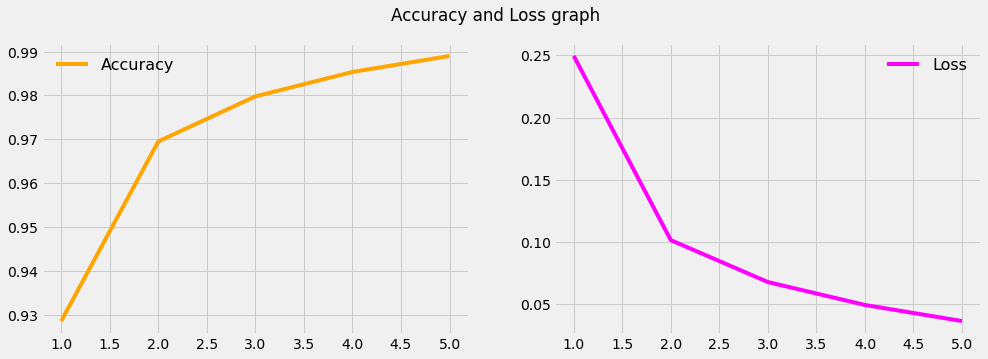

In [45]:
plotter(history.history['accuracy'], history.history['loss'], 'Accuracy and Loss graph')

In [52]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='relu'))
network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: nan - accuracy: 0.1179
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: nan - accuracy: 0.0987
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: nan - accuracy: 0.0987
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: nan - accuracy: 0.0987
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: nan - accuracy: 0.0987


In [53]:
val_loss, val_acc = network.evaluate(test_images, test_labels)
print('Validation loss:', val_loss, '\nValidation accuracy: ', val_acc)

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0980
Validation loss: nan 
Validation accuracy:  0.09799999743700027


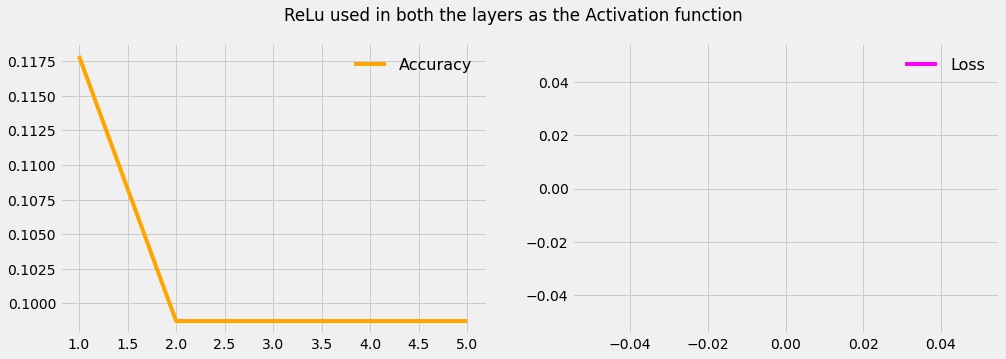

In [54]:
plotter(history.history['accuracy'], history.history['loss'], 'ReLu used in both the layers as the Activation function')

In [49]:
network = models.Sequential()
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4288 - accuracy: 0.8826
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2343 - accuracy: 0.9325
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1776 - accuracy: 0.9483
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1393 - accuracy: 0.9593
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1123 - accuracy: 0.9672


In [50]:
val_loss, val_acc = network.evaluate(test_images, test_labels)
print('Validation loss:', val_loss, '\nValidation accuracy: ', val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1132 - accuracy: 0.9666
Validation loss: 0.11318080127239227 
Validation accuracy:  0.9666000008583069


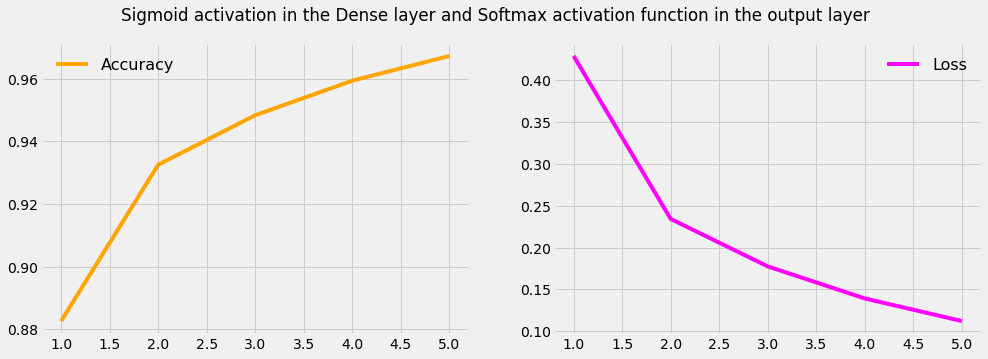

In [51]:
plotter(history.history['accuracy'], history.history['loss'], 'Sigmoid activation in the Dense layer and Softmax activation function in the output layer')